**Bài tập 3**: Cài đặt và giải quyết bài toán với bộ dữ liệu Fish.csv data set đầy đủ gồm 3 lớp và 150 mẫu dữ liệu bằng thuật toán Support Vector Machine.

- Vẽ biểu đồ 2D và 3D
- Vẽ Confusion Matrix
- Xuất các giá trị Precision, Recall, F1-Score tương ứng

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
# Đọc dữ liệu từ file CSV
dfdata = pd.read_csv('/content/drive/MyDrive/TH1391_NLMH/NLMH_OnkiemTra/Chap2_Classification_3SVM/Fish.csv')
print(dfdata)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [4]:
# Cắt dữ liệu lại còn lại 150 mẫu
dfdata = dfdata.iloc[:150]
print(dfdata.shape[0]) # in ra số mẫu

150


In [5]:
# Chia feature và label
X = dfdata.drop('Species', axis=1)

In [6]:
# Chia feature và label
X_2D = dfdata[['Weight', 'Length1']]
y = dfdata['Species']

In [7]:
X_2D.head()

,Weight,Length1
0,242.0,23.2
1,290.0,24.0
2,340.0,23.9
3,363.0,26.3
4,430.0,26.5


In [8]:
y.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [9]:
# Chuyển đổi nhãn loại thành các số
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Giả sử y là biến mục tiêu của bạn trước khi mã hóa
print("Trước khi mã hóa:")
print(y.unique())  # In ra các giá trị duy nhất trong y

encoder_2D = LabelEncoder()
y_le = encoder_2D.fit_transform(y)

print("\nSau khi mã hóa:")
print(np.unique(y_le))

print("\nMapping:")
for class_index in np.unique(y_le):
    print(f'{class_index} --> {encoder_2D.inverse_transform([class_index])[0]}')

Trước khi mã hóa:
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']

Sau khi mã hóa:
[0 1 2 3 4 5 6]

Mapping:
0 --> Bream
1 --> Parkki
2 --> Perch
3 --> Pike
4 --> Roach
5 --> Smelt
6 --> Whitefish


In [10]:
# Chia tập dữ liệu thành train set và test set
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.2, random_state=42)

In [11]:
# Huấn luyện mô hình SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Đánh giá mô hình trên tập test
accuracy = svm_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


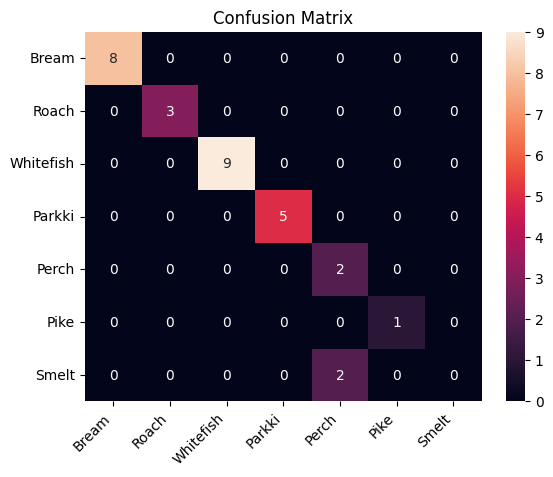

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         5
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.93      0.86      0.81        30
weighted avg       0.97      0.93      0.91        30



In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự đoán trên tập test
y_pred = svm_model.predict(X_test)

# In ra confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:\n', cm)

# Chuyển đổi confusion matrix thành phần trăm
# cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = y.unique()

# Hiển thị confusion matrix bằng seaborn
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
# sns.heatmap(cm_percent, annot=True, fmt='.1%', cmap='Blues')
plt.title('Confusion Matrix')
# plt.xlabel('Predicted label')
# plt.ylabel('True label')

# Tùy chỉnh trục x để tránh chồng chữ
plt.xticks(rotation=45, ha='right')

plt.show()

# In ra các chỉ số đánh giá mô hình
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))

In [14]:
# Chia tập dữ liệu thành train set và test set
X_train2D, X_test2D, y_train2D, y_test2D = train_test_split(X_2D, y_le, test_size=0.2, random_state=42)

In [15]:
# Huấn luyện mô hình SVM
from sklearn.svm import SVC

svm_model2D = SVC(kernel='linear')
svm_model2D.fit(X_train2D, y_train2D)

SVC(kernel='linear')

In [16]:
# Đánh giá mô hình
y_pred = svm_model2D.predict(X_test2D)
print(classification_report(y_test2D, y_pred, target_names=encoder_2D.classes_))

              precision    recall  f1-score   support

       Bream       0.71      0.62      0.67         8
      Parkki       0.00      0.00      0.00         3
       Perch       0.41      0.78      0.54         9
        Pike       1.00      1.00      1.00         5
       Roach       0.00      0.00      0.00         2
       Smelt       1.00      1.00      1.00         1
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.60        30
   macro avg       0.45      0.49      0.46        30
weighted avg       0.51      0.60      0.54        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


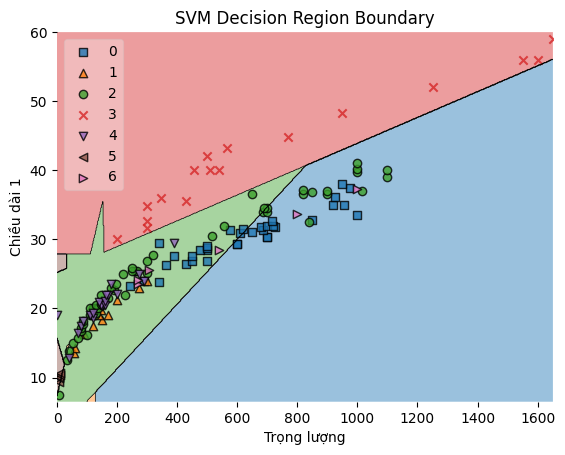

In [18]:
from mlxtend.plotting import plot_decision_regions

# Vẽ biểu đồ vùng quyết định
plot_decision_regions(X_2D.to_numpy(), y_le, clf=svm_model2D, legend=2)

plt.xlabel('Trọng lượng')
plt.ylabel('Chiều dài 1')
plt.title('SVM Decision Region Boundary')
plt.show()

In [19]:
# # vẽ biểu đồ 2D - Biểu đồ vùng sẽ phù hợp hơn
# plt.figure(figsize=(8, 6))

# # Tạo biểu đồ scatterplot của dữ liệu bằng cách sử dụng hai đặc trưng đầu tiên:
# plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=y_le, s=50, cmap='autumn')

# # vẽ đường ranh giới quyết định của mô hình - Xác định phạm vi hiện tại của biểu đồ trên cả hai trục:
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # tạo ma trận grid để dự đoán - Tạo ma trận grid để dự đoán, sử dụng phạm vi đã xác định:
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T

# # lấy giá trị quyết định từ mô hình SVM - Lấy giá trị quyết định từ mô hình SVM cho mỗi điểm trên ma trận grid:
# # Z = svm_model2D.decision_function(xy)
# # print(Z.shape)
# # print(xy.shape)
# # Z = Z.reshape(XX.shape)
# ## Sử dụng chỉ số lớp để lấy ra một cột từ mảng quyết định và sử dụng cột đó để vẽ đường ranh giới quyết định
# Z = svm_model2D.decision_function(xy)[:, 0]
# Z = Z.reshape(XX.shape)

# ## Tính tổng hoặc trung bình các giá trị quyết định trên tất cả các lớp
# # Z = svm_model2D.decision_function(xy).mean(axis=1)
# # Z = Z.reshape(XX.shape)

# # vẽ đường ranh giới quyết định và margin - Vẽ đường ranh giới quyết định và margin của mô hình:
# # plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# # Vẽ biểu đồ scatterplot của dữ liệu bằng cách sử dụng hai đặc trưng đầu tiên:
# import seaborn as sns
# sns.scatterplot(x=X_2D.iloc[:, 0], y=X_2D.iloc[:, 1], hue=y)

# # Vẽ đường ranh giới quyết định cho mỗi lớp
# for i, class_name in enumerate(encoder_2D.classes_):
#     plt.scatter(*svm_model2D.support_vectors_[y_train2D[svm_model2D.support_].ravel() == i].T, s=100, facecolors='none', edgecolors='k', marker='o')

# # Đặt lại phạm vi của trục x và y để phù hợp với dữ liệu ban đầu:
# plt.xlim(xlim)
# plt.ylim(ylim)

# # Thêm nhãn cho các trục và tiêu đề cho biểu đồ:
# plt.xlabel('Cân nặng')
# plt.ylabel('Chiều cao 1')
# plt.title('SVM with Decision Boundary')

# # Hiển thị biểu đồ:
# plt.show()

In [20]:
# Chia feature và label
X_3D = dfdata[['Weight', 'Length1', 'Height']]

In [21]:
# Chia tập dữ liệu thành train set và test set
X_train3D, X_test3D, y_train3D, y_test3D = train_test_split(X_3D, y_le, test_size=0.2, random_state=42)

In [22]:
# # Trực quan hóa SVM 3D
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_3D.iloc[:, 0], X_3D.iloc[:, 1], X_3D.iloc[:, 2], c=y_le, cmap='autumn')
# ax.set_xlabel('Cân nặng')
# ax.set_ylabel('Chiều dài 1')
# ax.set_zlabel('Chiều cao')
# ax.set_title('SVM 3D')
# plt.show()

In [23]:
import plotly.express as px

# Tạo DataFrame từ dữ liệu của bạn
df = pd.DataFrame({
    'Cân nặng': X_3D.iloc[:, 0],
    'Chiều dài 1': X_3D.iloc[:, 1],
    'Chiều cao': X_3D.iloc[:, 2],
    'Tên loài': y
})

fig = px.scatter_3d(df,
                    x='Cân nặng',
                    y='Chiều dài 1',
                    z='Chiều cao',
                    color='Tên loài',
                    labels={'Tên loài': 'Tên loài'})

fig.update_traces(marker=dict(size=3))

# Cập nhật kích thước biểu đồ
# fig.update_layout(width=1200, height=700)
fig.update_layout(height=1100)

fig.show()